# CPS 803 / CP 8318
# Assignment 1 - [Your Name Here] - [StudentID]
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [40]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]




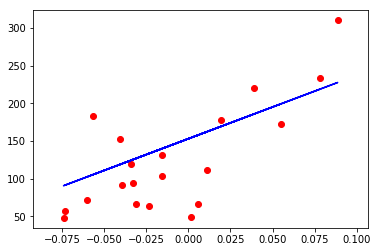

In [41]:
##### YOUR CODE HERE #######
##### YOUR CODE HERE #######

import matplotlib.pyplot as plt



samples = len(diabetes_X_train)
iterations = 10000
lr = 0.1

#Add the bias by adding a 1 to each row of X
X= np.c_[np.ones((samples,1)),diabetes_X_train]
X_test = np.c_[np.ones((len(diabetes_X_test),1)),diabetes_X_test]
y= diabetes_y_train.reshape(samples,1)

weights = np.random.randn(2,1)


for i in range(iterations):
    sum = X.T.dot(X.dot(weights) - y)
    weights = weights - (lr/samples)*sum


#print(weights)

#Using Sklearn
# reg1 = linear_model.LinearRegression()
# reg1.fit(diabetes_X_train,diabetes_y_train)
# preds1 = reg1.predict (diabetes_X_test)

#Using gradiant descent from scratch
reg = linear_model.LinearRegression()
reg.fit(X,X.dot(weights))
preds = reg.predict(X_test)

#Plot test points
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red')
plt.plot(diabetes_X_test,preds,color = 'blue')
#plt.plot(diabetes_X_test,preds1,color = 'green')
plt.show()

[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation: SEE AFTER PART C FOR CODE

I decided to split 80%/10%/10% for training, validation, and test respectivly. I allocated more to training because more data used for training will make the model more accurate. Validation and test dont need to be as large because they dont affect how the model will perform. They are just used to validate how accurate our trained model is using data the model has not seen. 

In [4]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### YOUR CODE HERE #######

#SEE AFTER PART C FOR CODE

[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>


I picked features that I thought would have an impact on whether people would want to see the movie or not. Things such as ID proably dont have much of an affect on whether someone wants to watch a movie. I also stayed away from features that have many unique values such as overview and original title. With so many different values for a column, it wont really help the model predict how much money it will make and is just noise. 

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

We find that the rating of a movie does not necessarily mean higher revenues. The peak of the trend is at 3 stars and slowly goes down from there. There is a correlation between ratings and revenue but a high ratings does not mean high revenue and vice versa.  

iii. Visualize any other relationships you deem interesting and explain. <br>

RATING vs REVENUE GRAPH

Another trend is that most movies did not make more that 500,000,000. The movies that did make more than that are have average ratings of around 2.8 to 4. This is interesting because after 4 there are almost no movies that made more than 500 million.

Another trend i see is that movies that were rated exactly 5 stars earned just as much or even less revenues than movies that were rated 1 star. It seems like movies on the extrmemes of the ratings tend to make the least amount of money regradless of whether they were rated highly or poorly.

BUDGET vs REVENUE GRAPH

This graph represents how much money the movie made relative to how much was put in to make it. We see that for the most part, revenues go down as the budget increases. In fact, the majority of higher revenue movies have the lowest budgets.   


Notes about the data
There is also not a lot of data to work with since I cut meta_data and ratings_small down to around 2100 rows each. I also took the average rating for each movie if there were multiple ratings. This could skew the results. Another option could have been to take the mode of the ratings. 


In [5]:
#PART I

#meta_data.head()
# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
#meta_data.head()
# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

##### YOUR CODE HERE #######


#Features
# features = ['runtime','vote_average','vote_count','revenue']
# features = ['id','budget','vote_average','revenue']
features = ['vote_average','revenue']
data = meta_data[features]


#Drop rows where Revennue isn't given
data.dropna(subset=['revenue'],axis =0,inplace = True)

#Let y be data labels and drop revenue from data table
y = data.revenue
data.drop(['revenue'],axis =1,inplace = True)


#Fill numeric values with the average and categorical values with the more frequent
for col, column in enumerate(data.columns):
    if (data[column].dtype=='int64' or data[column].dtype=='float64'):
        data[column] = pd.to_numeric(data[column],errors = 'coerce')
        data[column].fillna(data[column].mean,inplace = True)
        
    elif(data[column].dtype == 'object'):
        data[column] = pd.to_numeric(data[column],errors = 'coerce')
        data[column].fillna(data[column].mode,inplace = True)
        

        
#print(data.isnull().sum())
data.head()

,vote_average
0,7.7
1,6.9
2,6.5
3,6.1
4,5.7


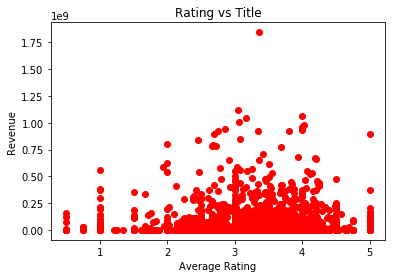

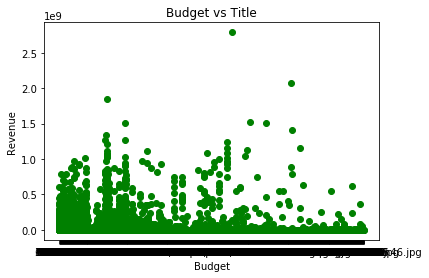

In [6]:
#PART II

#Reduce ratings_small and meta_data to contain the same movies

ratings_data = ratings_small
movie_data = meta_data


#Set up ratings to have the average rating for each movie ID
ratings_data['avg_rating'] = ratings_data.groupby(['movieId'])['rating'].transform('mean') 
ratings_data.drop_duplicates(subset= 'movieId',inplace =True)

#Make Ratings ID the same data type at meta_data id
ratings_data['movieId']= ratings_data['movieId'].astype(str)


#Set up meta_data to have only the same movies as ratings
#Remove duplicate ID rows
movie_data.drop_duplicates(subset = 'id',inplace = True)
  
#Reduce both data sets to contain only common ID rows
movie_data = movie_data[movie_data['id'].isin(ratings_data['movieId'])]
ratings_data = ratings_data[ratings_data['movieId'].isin(movie_data['id'])]

#Sort the datasets
movie_data.sort_values(by = 'id', inplace = True)
ratings_data.sort_values(by = 'movieId',inplace = True)

#Check to see if they are the same size
# print(movie_data.shape)
# print(ratings_data.shape)

#Show revenue vs rating

#NOTE RE-RUN ALL ABOVE CODE TO VIEW SCATTER PLOT. RUNNING THIS BLOCK TWICE IN A ROW CHANGES THE GRAPHS

#Rating vs Revenue
plt.scatter(ratings_data.avg_rating,movie_data.revenue,color = 'red')
plt.xlabel("Average Rating")
plt.ylabel("Revenue")
plt.title("Rating vs Title")
plt.show()

#Budget vs Revenue
plt.scatter(meta_data.budget, meta_data.revenue,color = 'green')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Title")
plt.show()



In [7]:
#PART B Data Split
# Split data into train, test, and validation

size = len(data)
train_size = int(size*0.8) # 80% training
test_size = int(size*0.1) # 10% test
val_size = int(size*0.1) # 10% validation

X_train = data[0:train_size]
y_train = y[0:train_size]

X_test = data[train_size: train_size+ test_size]
y_test = y[train_size:train_size+test_size]

X_val = data[train_size+ test_size: ]
y_val = y[train_size+ test_size: ]



[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

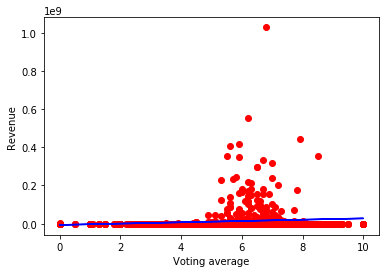

In [8]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.

##### YOUR CODE HERE #######

"""
Notes abour Error

In the data theres seems to be a lot of instances where the labeled revenues
are $0. This will have an effect on the model as causing the graphs to look
very flat. 

"""

#Train the model
reg.fit(X_train,y_train)
preds_val = reg.predict(X_val)
preds=reg.predict(X_test)



#Plot data
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,preds,color = 'blue')
plt.xlabel("Voting average")
plt.ylabel("Revenue")
plt.show()



#The model used the voting average to predict revenue. The blue line is the model


[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

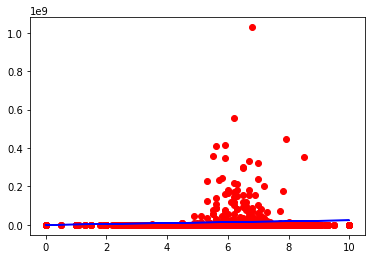

In [9]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

from sklearn.kernel_ridge import KernelRidge

#KernelRidge needs a positive value or alpha so i made it very small instead of 0
clf = KernelRidge(alpha=0.000001)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)


plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,preds,color = 'blue')
plt.show()

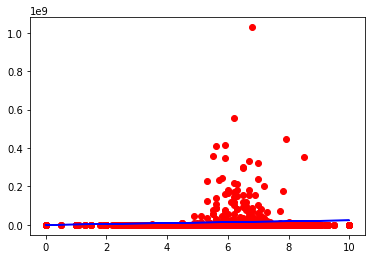

In [10]:
##### YOUR CODE HERE WITH REGULARIZATION #######

clf = KernelRidge(alpha=10.0)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)


plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,preds,color = 'blue')
plt.show()


## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

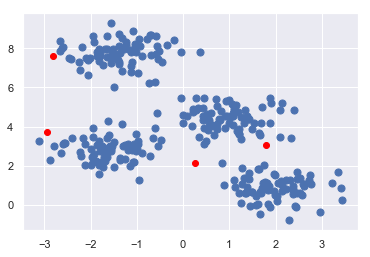

[ 0.25979711 -2.82028558 -2.93714245  1.78700387] [2.16611956 7.58621007 3.74986396 3.06475397]
[ 1.98258281 -1.37324398 -1.58438467  0.94973532] [0.86771314 7.75368871 2.83081263 4.41906906]


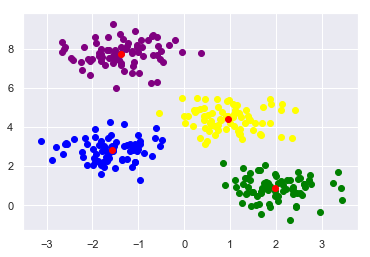

In [2]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################
import math
from statistics import mean

k = 4

#Initialize Random Centers
centers = []
centersx = ( -3 + np.random.sample(k) *6)
centersy = ( 0  + np.random.sample(k) *8)

plt.scatter(centersx,centersy, color = 'red')
plt.show()


#Assign each point to a center
print(centersx,centersy)
#List of smaples length with numbers 1 - k that correspond to which center each value is in
iterations =40

#Arrays that will hold the X and Y values that belong to each cluster
c0_X =[]
c0_y =[]
c1_X =[]
c1_y =[]
c2_X =[]
c2_y =[]
c3_X =[]
c3_y =[]

#Iterate X amount of times
for i in range(iterations):

    groups= []
    
    #Reset X and Y values
    c0_X =[]
    c0_y =[]
    c1_X =[]
    c1_y =[]
    c2_X =[]
    c2_y =[]
    c3_X =[]
    c3_y =[]


    #For each point in the dataset
    for pair in X: 

        #Calulate the distance to each point
        c0= math.sqrt( ((pair[0]-centersx[0])**2)+((pair[1]-centersy[0])**2) )
        c1= math.sqrt( ((pair[0]-centersx[1])**2)+((pair[1]-centersy[1])**2) )
        c2= math.sqrt( ((pair[0]-centersx[2])**2)+((pair[1]-centersy[2])**2) )
        c3= math.sqrt( ((pair[0]-centersx[3])**2)+((pair[1]-centersy[3])**2) )
        #print([c0,c1,c2,c3])
        list = [c0,c1,c2,c3]
        
        #Add each point to the list of the closest center point
        if min(list) == c0: 
            groups.append(0)
            c0_X.append(pair[0])
            c0_y.append(pair[1])
            #print(0)
        elif min(list) == c1:
            groups.append(1)
            c1_X.append(pair[0])
            c1_y.append(pair[1])
            #print(1)
        elif min(list) == c2:
            groups.append(2)
            c2_X.append(pair[0])
            c2_y.append(pair[1])
            #print(2)
        elif min(list) == c3:
            groups.append(3)
            c3_X.append(pair[0])
            c3_y.append(pair[1])
            #print(3)


    #Shift centers by getting the mean of all the points that belong to that center
    if len(c0_X) >0:
        centersx[0] = mean(c0_X)
        
    if len(c1_X) >0:
        centersx[1] = mean(c1_X)
      
    if len(c2_X) >0:
        centersx[2] = mean(c2_X)
      
    if len(c3_X) >0:
        centersx[3] = mean(c3_X)
       
        
    if len(c0_y) >0:
        centersy[0]= mean(c0_y)
        
    if len(c1_y) >0:
        centersy[1]= mean(c1_y)
       
    if len(c2_y) >0:
        centersy[2]= mean(c2_y)
        
    if len(c3_y) >0:
        centersy[3]= mean(c3_y)
        

    
#Final center coordinates [X],[y]
print(centersx,centersy)

#Plot each center and the points that belong to it
plt.scatter(c0_X,c0_y,color = 'green')
plt.scatter(c1_X,c1_y,color = 'purple')
plt.scatter(c2_X,c2_y,color = 'blue')
plt.scatter(c3_X,c3_y,color = 'yellow')
        

#plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(centersx,centersy, color = 'red')
plt.show()
#centers


# Uncomment to display clusters and cluster centers
#plt.scatter(X[:, 0], X[:, 1], c=labels,
#            s=50, cmap='viridis');
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [15]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)

#NOTE: THE FOLLOWING CELLS THAT ARE ALL COMMENTED OUT ARE THE PROCESS OF FINDING THE OPTIMAL AMOUNT OF CLUSTERS
#THEY ARE COMMENTED OUT BECAUSE THEY TOOK 16 HOURS TO RUN AND STILL COULDN'T GET THE RIGHT ANSWER :C 

from sklearn.cluster import KMeans


mystery = np.load('mystery.npy')
#mystery.shape
#print(mystery[0])


k_means = KMeans(n_clusters =200)
k_means.fit(mystery)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
mystery.shape

(30309, 784)

In [141]:
# clusters = 250

# cluster_num = [clusters]
# score = [k_means.score(mystery)] 

# for i in range(1,10):
#     k_means = KMeans(n_clusters = clusters,max_iter = 500)
#     k_means.fit(mystery)
#     score.append(k_means.score(mystery))
#     cluster_num.append(clusters)
#     clusters = clusters +50

# print(score)

[-41092986236.02047, -41131752297.641335, -39968985168.9627, -39029708845.54799, -38197314422.65695, -37505504794.256905, -36841014416.41806, -36195821794.96944, -35726020688.599594, -35230777962.96538]


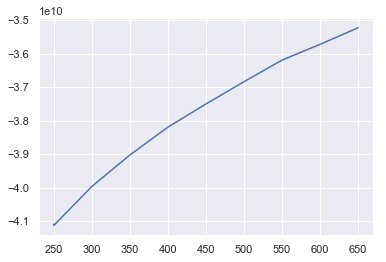

In [142]:

# #print(score[:][0])

# plt.plot(cluster_num,score)
# plt.show()

In [143]:
# clusters = 700

# # cluster_num = []
# # score = [] 

# for i in range(1,10):
#     k_means = KMeans(n_clusters = clusters)
#     k_means.fit(mystery)
#     score.append(k_means.score(mystery))
#     cluster_num.append(clusters)
#     clusters = clusters +100

# print(score)

[-41092986236.02047, -41131752297.641335, -39968985168.9627, -39029708845.54799, -38197314422.65695, -37505504794.256905, -36841014416.41806, -36195821794.96944, -35726020688.599594, -35230777962.96538, -34762042271.900406, -33949252488.952934, -33221406934.838146, -32579163557.866955, -31985945957.133118, -31443000293.228107, -30938043982.25255, -30454218126.03869, -29990217217.933235]


In [145]:
# print(score)
# print(cluster_num)

[-41092986236.02047, -41131752297.641335, -39968985168.9627, -39029708845.54799, -38197314422.65695, -37505504794.256905, -36841014416.41806, -36195821794.96944, -35726020688.599594, -35230777962.96538, -34762042271.900406, -33949252488.952934, -33221406934.838146, -32579163557.866955, -31985945957.133118, -31443000293.228107, -30938043982.25255, -30454218126.03869, -29990217217.933235]
[250, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]


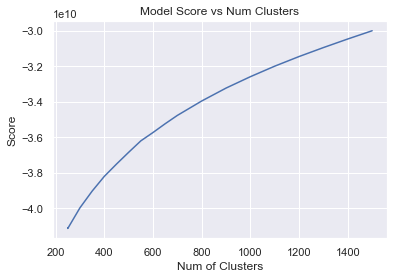

In [146]:
# #print(score[:][0])

# plt.plot(cluster_num,score)
# plt.title("Model Score vs Num Clusters")
# plt.xlabel("Num of Clusters")
# plt.ylabel("Score")
# plt.show()

In [11]:
# clusters = 1400

# cluster_num = []
# score = [] 

# for i in range(1,10):
#     k_means = KMeans(n_clusters = clusters)
#     k_means.fit(mystery)
#     score.append(k_means.score(mystery))
#     cluster_num.append(clusters)
#     clusters = clusters +200

# print(score)

[-30469928113.77723, -29595873423.23063, -28813404091.616203, -28069594215.419815, -27403362536.07329, -26775315111.751083, -26168707913.691833, -25614915942.47933, -25021228761.480774]


[-30469928113.77723, -29595873423.23063, -28813404091.616203, -28069594215.419815, -27403362536.07329, -26775315111.751083, -26168707913.691833, -25614915942.47933, -25021228761.480774]
[1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]


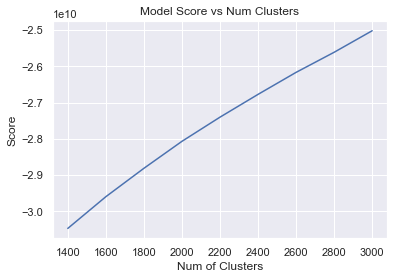

In [12]:
# print(score)
# print(cluster_num)
# plt.plot(cluster_num,score)
# plt.title("Model Score vs Num Clusters")
# plt.xlabel("Num of Clusters")
# plt.ylabel("Score")
# plt.show()

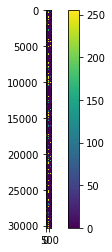

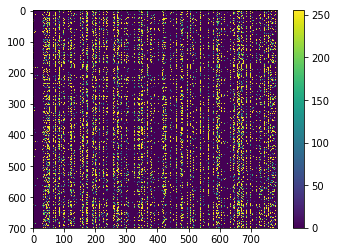

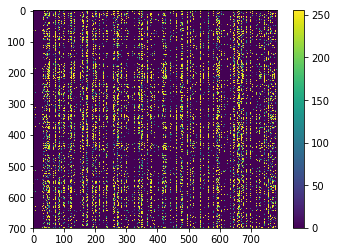

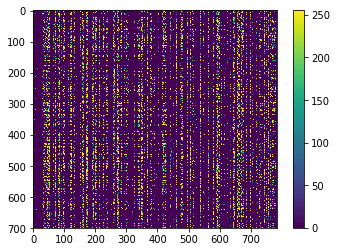

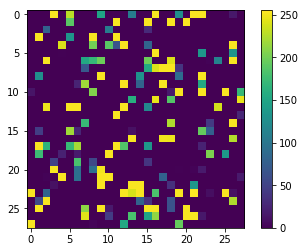

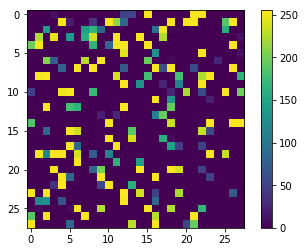

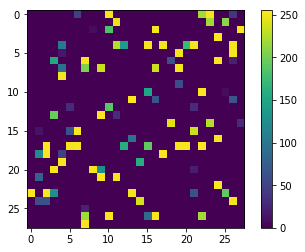

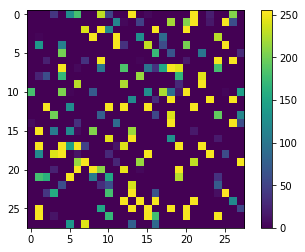

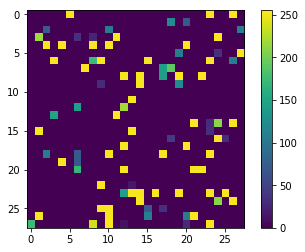

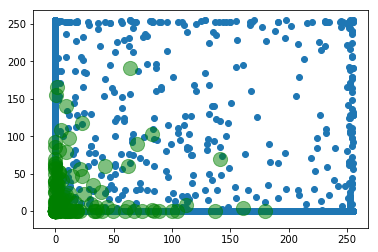

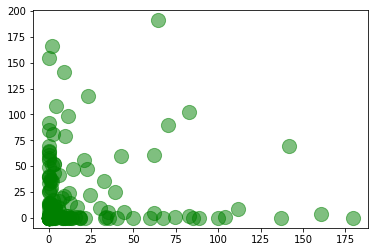

-42513856901.76227


In [37]:
# # Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
# #plt.matshow(mystery[:1000])
# # for i in range(len(mystery[0])-1):
# #     plt.scatter(mystery[:, i], mystery[:, i+1])

# plt.scatter(mystery[:,0], mystery[:,1])

# centers = k_means.cluster_centers_
# print(centers.shape)
# #plt.scatter(centers[:], centers[:], c='black')
# plt.show()

plt.imshow(mystery)
plt.colorbar()
plt.show()


plt.imshow(mystery[:700])
plt.colorbar()
plt.show()


plt.imshow(mystery[15000:15700])
plt.colorbar()
plt.show()

plt.imshow(mystery[29000:29700])
plt.colorbar()
plt.show()

for i in range(5):

    image = mystery[i]
    new_image = []

    for i in range(28):
        new_image.append(image[i*28:i*28+28])
        #print(i*28, " to ", i*28+28)
    #print(new_image)

    plt.imshow(new_image)
    plt.colorbar()
    plt.show()


c1 = 0
c2 = 1

plt.scatter(mystery[:, c1], mystery[:, c2])

centers = k_means.cluster_centers_

plt.scatter(centers[:, c1], centers[:, c2], c='green', s=200, alpha=0.5);
plt.show()

plt.scatter(centers[:, c1], centers[:, c2], c='green', s=200, alpha=0.5);
plt.show()


print(k_means.score(mystery))
#print(k_means.labels_)
#print(centers[0])
#plt.scatter(mystery[0],mystery[1])
#plt.show()




Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

I tried using the kmeans.score() to determin how many clusters would be ideal. I fit the data and measured the score for different values of n_clusters. Unfortuanately this took many hours of computation and I never found the ideal number of clusters. All i know is that it is well over 3000 according to the graphs above.

It is difficult to visualize the data because there is just so much of it. The colorbar graph shows many different coloured elements spread throughout the graph. I displayed 3 small sections of 700 rows of the data near the beginning, middle and end. They all look very similar with yellow and green pixels surrounded by purple. It is difficult to see the data as a whole because it is displayed so tiny. 

I also showed some of the entries as 28x28 images but I cannot seem to make out what the images are

Finally i display the first couple entries of the data and their clusters


(any additional code supporting your assertion on the number of clusters may be included below)

In [ ]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

I thought this was the MNIST dataset because each image in that dataset is 28x28 = 784 but after viewing some of the entries with imshow(), I dont seem to see any numbers.
This dataset is likely a set of images that are 28x28 pixels in size.
Since the pixels are very spread out and there are many 0s, i am going to guess that this is a dataset of images of space. The higher values represent stars that are brighter, and the lower values are stars that are further away and not as bright. 

In [25]:
##### YOUR (OPTIONAL) CODE HERE #######
mystery.shape

(30309, 784)

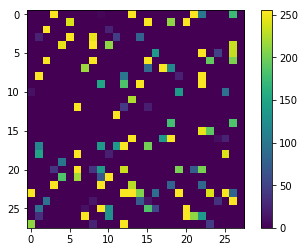

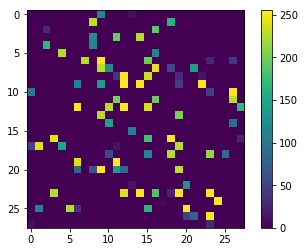

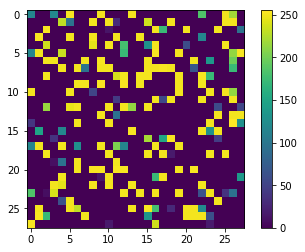

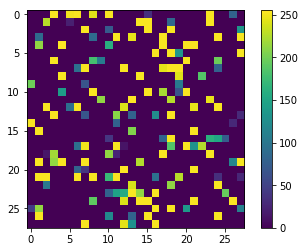

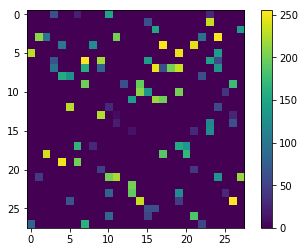

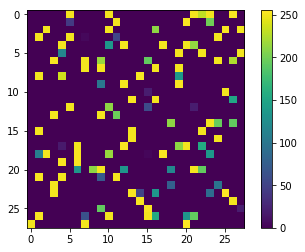

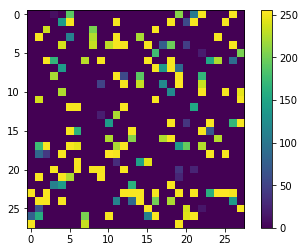

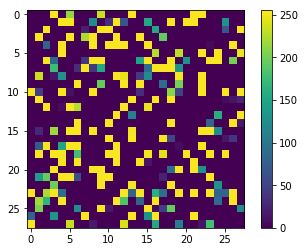

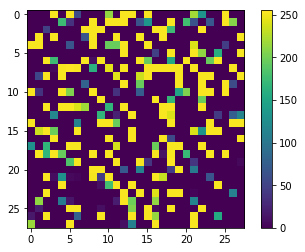

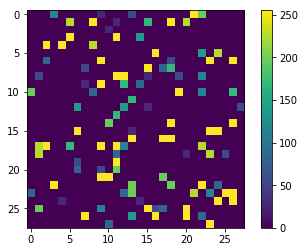

In [39]:
for i in range(10):

    image = mystery[i+1000]
    new_image = []

    for i in range(28):
        new_image.append(image[i*28:i*28+28])
        #print(i*28, " to ", i*28+28)
    #print(new_image)

    plt.imshow(new_image)
    plt.colorbar()
    plt.show()

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [ ]:
##### YOUR CODE HERE #######
